# EDA

#### Importing the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
pd.options.display.max_columns = 80
pd.set_option("display.max_rows", 600)
import plotly.express as px

#### Loading Data

In [2]:
df = pd.read_csv('laliga_prepared.csv', infer_datetime_format = True)

#### A word cloud of Players' name

In [3]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

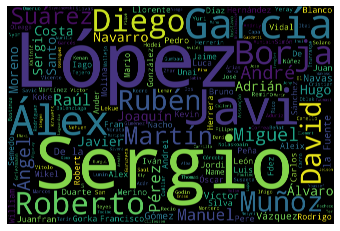

In [4]:

text = str(df.Name)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=7500,
    height=5000,
    margin=20).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


(-0.5, 999.5, 999.5, -0.5)

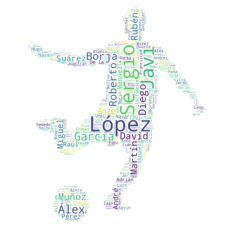

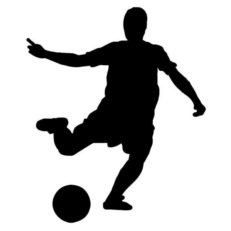

In [24]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

wonderland/255fk.jpg
soc_mask = np.array(Image.open(path.join(d, "soc2.jpg")))


wc = WordCloud(background_color="white", max_words=500, mask=soc_mask)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "soc2.jpg"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
#plt.show()

#### Number of teams in La Liga 

In [6]:
df['Team'].nunique()

20

#### Number of Players per team

In [5]:
num_play = df.groupby('Team')['Name'].count()

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Team', 'Player Number'],
                                          line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
                 cells=dict(values=[num_play.index, num_play.values],
                            line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
                     ])
fig.show()

fig.write_image("./images/fig.jpeg", scale = 1.5, height = 2.5)

#### Number of Players per team per position

In [10]:
df_num_pos = df.groupby(['Team', 'Position'], as_index=False)['Name'].count()

In [11]:
df_num_pos

,Team,Position,Name
0,Athletic Club,Defender,7
1,Athletic Club,Forward,5
2,Athletic Club,Goalkeeper,4
3,Athletic Club,Midfielder,13
4,Atlético de Madrid,Defender,11
5,Atlético de Madrid,Forward,7
6,Atlético de Madrid,Goalkeeper,3
7,Atlético de Madrid,Midfielder,11
8,CD Leganés,Defender,10
9,CD Leganés,Forward,6


#### Percentage of Players per Position

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels= df_num_pos.Position,
                             values=df_num_pos.Name, hole=.6)])
fig.show()

#### A sunburst plot of shirt number per Position and their count: 0 stands for missing shirt number 

In [13]:
m = df.groupby(['Shirt number', 'Position'], as_index= False)['Shirt number'].size()

In [14]:
m.index

MultiIndex([( 0,   'Defender'),
            ( 0,    'Forward'),
            ( 0, 'Goalkeeper'),
            ( 0, 'Midfielder'),
            ( 1, 'Goalkeeper'),
            ( 2,   'Defender'),
            ( 2,    'Forward'),
            ( 3,   'Defender'),
            ( 3, 'Midfielder'),
            ( 4,   'Defender'),
            ...
            (39, 'Goalkeeper'),
            (39, 'Midfielder'),
            (40, 'Midfielder'),
            (41, 'Midfielder'),
            (42,    'Forward'),
            (42, 'Midfielder'),
            (47, 'Midfielder'),
            (54,   'Defender'),
            (55, 'Midfielder'),
            (57, 'Midfielder')],
           names=['Shirt number', 'Position'], length=108)

In [15]:
c = [str(m.keys()[i][0]) for i in range(0, 108)]


In [16]:
d = [m.keys()[i][1] for i in range(0, 108)]
len(d)

108

In [17]:
e = list(m.values)
len(e)

108

In [18]:
zippedList =  list(zip(c, d, e))

In [19]:
dfObj = pd.DataFrame(zippedList, columns = ['Shirt Number' , 'Position', 'Count']) 

In [20]:
dfObj

,Shirt Number,Position,Count
0,0,Defender,9
1,0,Forward,3
2,0,Goalkeeper,5
3,0,Midfielder,13
4,1,Goalkeeper,20
5,2,Defender,15
6,2,Forward,2
7,3,Defender,16
8,3,Midfielder,2
9,4,Defender,16


In [21]:
import plotly.express as px
fig = px.sunburst(dfObj, path=['Shirt Number', 'Position'],
                  values='Count',
                 color='Count')
fig.show()

#### Comparing goals made by players wearing jersey number '9' who actually played 

In [22]:
forw = df.loc[df['Shirt number'] == 9 ]

In [23]:
forw = forw[forw['Full games played'] != 0]

In [25]:
fig = px.sunburst(forw, path=['Team', 'Name', 'Goals scored'], values='Goals scored')
fig.show()

#### A Polar Plot of Goals score by the seven top scorrer

In [54]:
forw_goal = forw.loc[rows, ["From inside the area","From outside the area", "Goals with left foot", "Goals with right foot", "Penalties scored.1", "Goals scored with header"]]

In [55]:
forw_goal

,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header
26,0,1,11,0,1,0
137,3,4,16,4,1,0
219,0,2,10,2,1,0
279,4,6,7,0,1,1
306,1,2,7,1,4,0
394,1,0,13,3,8,0
501,1,8,8,2,2,0


In [56]:
rows = list(forw[['Goals scored.1','Name']].index)

In [57]:
rows = [26, 137, 219, 279, 306, 394, 501]

In [58]:
list(forw_goal.loc[26])

[0, 1, 11, 0, 1, 0]

In [68]:
l = ['Inside the area',
 'Outside the area',
 'Left foot',
 'Right foot',
 'Penalties',
 'Header']

In [72]:
import plotly.graph_objects as go

categories = l

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=list(forw_goal.loc[26]),
      theta=l,
      fill='toself',
      name='William'
))
fig.add_trace(go.Scatterpolar(
      r=list(forw_goal.loc[rows[1]]),
      theta=l,
      fill='toself',
      name='Suárez'
))

fig.add_trace(go.Scatterpolar(
      r=list(forw_goal.loc[rows[2]]),
      theta=l,
      fill='toself',
      name='Roger'
))
fig.add_trace(go.Scatterpolar(
      r=list(forw_goal.loc[rows[3]]),
      theta=l,
      fill='toself',
      name='R.D.T.'
))
fig.add_trace(go.Scatterpolar(
      r=list(forw_goal.loc[rows[4]]),
      theta=l,
      fill='toself',
      name='M. Gómez'
))
fig.add_trace(go.Scatterpolar(
      r=list(forw_goal.loc[rows[5]]),
      theta=l,
      fill='toself',
      name='Benzema'
))
fig.add_trace(go.Scatterpolar(
      r=list(forw_goal.loc[rows[6]]),
      theta=l,
      fill='toself',
      name='Ben Yedder'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 17]
    )),
  showlegend=True
)

fig.show()
fig.write_image("./images/polar.jpeg", scale = 1.5, height = 2.5)

In [71]:
forw

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt,Float_Game_Played,Float_Game_Started,Float_Game_Substituted,Float_Full_ Game_Played
26,Athletic Club,Forward,9,Williams,3,38,"100,0%",19,"50,0%",36,"95,0%",19,"50,0%",3,0,0,13,0,0,39,1,7,81,30,18,9,0,127,145,79,98,21,52,40,0,0,4,3,56,33,4,50,42,13,0,1,11,0,1,0,0,31,1,27,449,272,177,686,666,12,8,7,1.00,0.95,0.50,0.50
85,CD Leganés,Forward,9,Carrillo,1,32,"84,0%",11,"29,0%",23,"61,0%",21,"55,0%",5,0,0,6,1,0,18,1,8,58,25,14,11,0,60,63,212,160,9,29,41,0,0,7,11,51,20,1,9,4,6,0,1,3,1,2,0,0,2,0,25,495,123,372,640,615,23,2,4,0.84,0.61,0.55,0.29
137,FC Barcelona,Forward,9,Suárez,2,33,"87,0%",27,"71,0%",31,"82,0%",6,"16,0%",5,0,0,21,4,0,29,4,8,69,23,11,7,0,109,139,24,11,27,57,31,3,0,4,9,93,58,6,36,54,18,3,4,16,4,1,0,0,21,0,18,283,248,35,956,881,63,12,6,0.87,0.82,0.16,0.71
164,Getafe CF,Forward,9,Ángel,1,37,"97,0%",3,"8,0%",20,"53,0%",34,"89,0%",4,0,0,8,0,0,16,1,8,59,8,7,9,0,57,99,31,68,35,35,42,0,1,8,7,50,21,3,11,15,7,1,2,6,0,0,0,0,27,0,16,255,156,99,317,286,27,4,5,0.97,0.53,0.89,0.08
192,Girona FC,Forward,9,Portu,2,34,"89,0%",20,"53,0%",33,"87,0%",14,"37,0%",3,0,0,9,1,0,47,1,9,104,1,24,9,0,105,156,26,83,11,42,26,0,0,2,2,33,19,2,32,38,9,0,0,8,1,1,0,0,72,0,33,370,261,109,621,593,24,4,6,0.89,0.87,0.37,0.53
219,Levante UD,Forward,9,Roger,1,31,"82,0%",9,"24,0%",23,"61,0%",22,"58,0%",4,0,0,13,2,0,41,1,4,48,8,6,2,0,47,85,25,56,8,32,38,1,0,3,4,56,30,0,11,16,13,0,2,10,2,1,0,0,17,0,9,213,132,81,347,320,24,3,8,0.82,0.61,0.58,0.24
247,R. Valladolid CF,Forward,9,Enes Ünal,2,33,"87,0%",11,"29,0%",24,"63,0%",22,"58,0%",7,0,0,6,3,0,30,4,2,67,18,10,7,0,71,113,102,149,17,39,42,0,0,3,14,38,16,3,18,20,6,0,0,4,3,2,0,0,8,0,17,435,184,251,524,502,20,2,3,0.87,0.63,0.58,0.29
279,Rayo Vallecano,Forward,9,R. D. T.,2,33,"87,0%",24,"63,0%",32,"84,0%",9,"24,0%",5,0,0,14,0,0,55,4,9,70,44,3,5,0,93,157,43,71,18,37,61,0,0,12,11,92,47,1,48,33,10,4,6,7,0,1,1,0,11,0,8,364,250,114,460,401,54,5,6,0.87,0.84,0.24,0.63
306,RC Celta,Forward,9,M. Gómez,2,35,"92,0%",28,"74,0%",33,"87,0%",7,"18,0%",4,1,1,13,1,0,51,0,2,79,43,4,2,0,80,124,140,138,43,66,70,0,0,11,8,62,28,5,14,16,12,1,2,7,1,4,0,0,12,0,6,482,204,278,673,624,47,2,8,0.92,0.87,0.18,0.74
332,RCD Espanyol,Forward,9,S. García,1,29,"76,0%",6,"16,0%",17,"45,0%",23,"61,0%",3,0,0,2,0,0,23,1,10,59,4,9,8,0,66,86,21,30,2,37,17,0,0,2,3,28,12,1,15,20,1,1,0,2,0,0,0,0,34,34,18,203,152,51,439,405,29,5,1,0.76,0.45,0.61,0.16
